# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os
import numpy as np
# load data from the pickled files in the current directory
cwd = os.getcwd()
training_file = cwd + "/train.p"
validation_file= cwd + "/valid.p"
testing_file = cwd + "/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**



### Summary of the Data Set Using Python and Numpy

In [2]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
print("Update image shape: {}".format(X_train[0].shape))

Update image shape: (32, 32, 3)


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

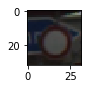

In [4]:
### The code in this cell selects an image from the training dataset at random and plots it

import matplotlib.pyplot as plt
import random

# Visualizations will be shown in the notebook.
%matplotlib inline
index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)


### Visualize training data

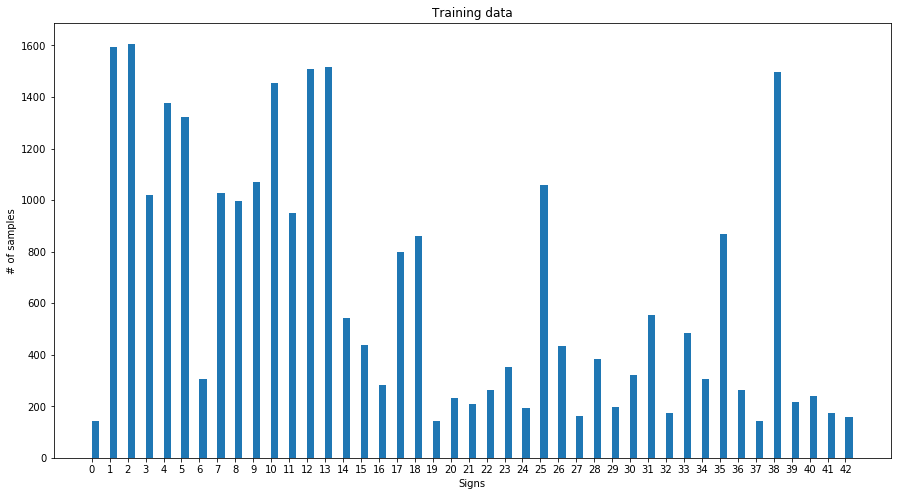

In [5]:
from collections import Counter
import csv

signs = {}
labels = []
d_train = Counter(y_train)


with open('signnames.csv', 'r') as signs_file:
    sign_reader = csv.reader(signs_file, delimiter=',')
    next(sign_reader)
    signs = dict(sign_reader)    
    signs = {int(k):v for k, v in signs.items()}
    labels = [k for k in d_train if k in signs]

plt.figure(figsize=(15,8))
plt.bar(range(len(d_train)), d_train.values(), align='edge', width = 0.4)
plt.xlabel('Signs')
plt.ylabel('# of samples')
plt.xticks(range(len(d_train)), labels)
plt.title('Training data')
plt.show()
plt.savefig('training_viz.png')

### Visualize validation data

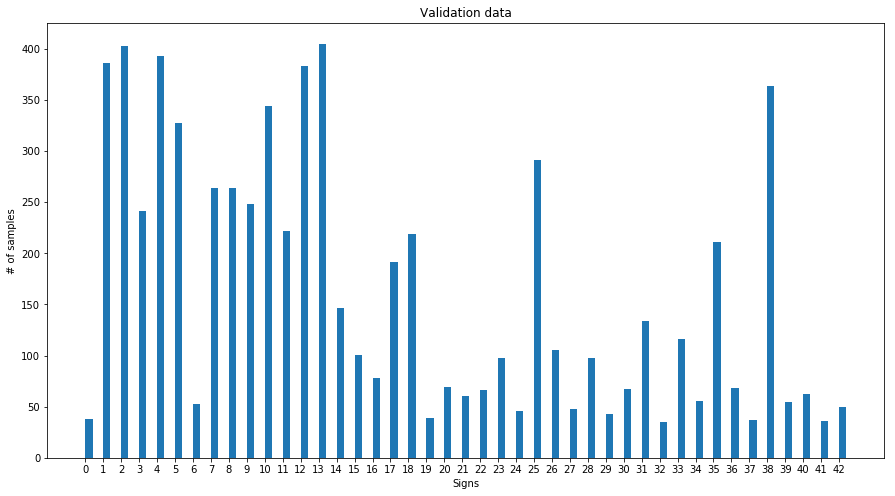

In [6]:
d_valid = Counter(y_valid)
labels = [k for k in d_valid if k in signs]

plt.figure(figsize=(15,8))
plt.bar(range(len(d_train)), d_valid.values(), align='edge', width = 0.4)
plt.xlabel('Signs')
plt.ylabel('# of samples')
plt.xticks(range(len(d_train)), labels)
plt.title('Validation data')
plt.show()
plt.savefig('validation_viz.png')

----

## Step 2: Design and Test a Model Architecture

The images from the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset)  were trained using the LeNet-5 implementation

With the LeNet-5 architecture as-is without normalization or gray-scaling, the accuracy on the training dataset is ~96%

### Pre-process the Data Set (normalization, grayscale, etc.)

Normalization and Gray scaling methods are defined but not utilized by the model since accuracy on the training
set seems to suffer


In [ ]:
# Image normalization. Note - although this method was implemented, it was not invoked since the accuracy was 
# suffering for normalizedimages

def Normalize(img):
    return (img - 128)/128

In [ ]:
def GrayScale(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

In [7]:
### Shuffle the train data sets
import cv2
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)


In [8]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

### Model Architecture

In [9]:
### LeNet network

from tensorflow.contrib.layers import flatten
fc1_value = None
def LeNet(x):
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits, fc1


### Features and labels

In [10]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3)) #input placeholder
y = tf.placeholder(tf.int32, (None)) #label placeholder
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Training pipeline

In [11]:
rate = 0.001

logits, fc1 = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

### Model Evaluation

In [12]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))

accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Train the model

In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        training_accuracy = evaluate(X_train, y_train)    
        validation_accuracy = evaluate(X_valid, y_valid)        
        print("EPOCH {} ...".format(i+1))
        print("Training accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Training accuracy = 0.736
Validation Accuracy = 0.713

EPOCH 2 ...
Training accuracy = 0.885
Validation Accuracy = 0.861

EPOCH 3 ...
Training accuracy = 0.923
Validation Accuracy = 0.894

EPOCH 4 ...
Training accuracy = 0.960
Validation Accuracy = 0.928

EPOCH 5 ...
Training accuracy = 0.965
Validation Accuracy = 0.934

EPOCH 6 ...
Training accuracy = 0.978
Validation Accuracy = 0.951

EPOCH 7 ...
Training accuracy = 0.973
Validation Accuracy = 0.940

EPOCH 8 ...
Training accuracy = 0.977
Validation Accuracy = 0.944

EPOCH 9 ...
Training accuracy = 0.980
Validation Accuracy = 0.951

EPOCH 10 ...
Training accuracy = 0.977
Validation Accuracy = 0.949

Model saved


In [22]:
import tensorflow as tf

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    logits_ph = sess.run(logits, feed_dict={x:X_test})
    correct_prediction_test = tf.equal(tf.argmax(logits_ph, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32))    
    test_accuracy = sess.run(accuracy_operation_test, feed_dict={x: X_test, y: y_test})    
    tf.Print(correct_prediction_test, [correct_prediction_test])
    
    print("Test accuracy = {:.3f}".format(test_accuracy))

Test accuracy = 0.851


---

## Step 3: Test a Model on New Images

Test data was pulled from a separate dataset in the German traffic signs image set and 5 images are picked randomly for each run

### Load test images

In [14]:
# This method reads the image test dataset from disk and returns 5 selected images along with their labels

import csv
import random
import PIL
from PIL import Image
def readTrafficSigns(rootpath = ''):
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    #load 5 images from disk
    path = './examples/'
    prefix = 'test_img_'
    img_num = ['3', '25', '33', '29', '40']
    
    ext = '.jpg'
    for i in img_num:        
        img = Image.open(path + prefix + i + ext)
        img = img.resize((32,32),PIL.Image.ANTIALIAS)#resize images to 32x32                  
        img_arr = np.asarray(img)        
        images.append(img_arr)
    for l in img_num:
        labels.append(int(l))
    return images, labels

29


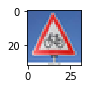

In [15]:
### Plot an image selected at random from the test data

test_images, test_labels = readTrafficSigns()
test_index = random.randint(0, len(test_images)-1)

test_image = test_images[test_index]

plt.figure(figsize=(1,1))
plt.imshow(test_image)
print(test_labels[test_index])

### Predict the Sign Type for Each Image

In [ ]:
### Prediction for test images and output of the accuracy


In [18]:
import tensorflow as tf
test_accuracy = None
softmax_values = None
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    logits_ph = sess.run(logits, feed_dict={x:test_images})
    correct_prediction_test = tf.equal(tf.argmax(logits_ph, 1), tf.argmax(one_hot_y, 1))
    accuracy_operation_test = tf.reduce_mean(tf.cast(correct_prediction_test, tf.float32))    
    test_accuracy = sess.run(accuracy_operation_test, feed_dict={x: test_images, y: test_labels})    
    tf.Print(correct_prediction_test, [correct_prediction_test])
    
    softmax_values = sess.run(tf.nn.top_k(tf.constant(logits_ph),k=5))
    

### Analyze Performance

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

print(test_labels)       
print("Test accuracy = {:.3f}".format(test_accuracy))

[3, 25, 33, 29, 40]
Test accuracy = 0.200


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [20]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

print(softmax_values)

TopKV2(values=array([[   9.95787239,    8.05177307,    6.2078042 ,    6.13723183,
           5.91021347],
       [  33.50370789,   25.70196915,   17.09664536,   12.87154293,
           8.27321815],
       [  22.45046234,   15.90615749,   15.7567234 ,   12.60807514,
          11.27912903],
       [  22.79987526,   15.11787987,   10.60352516,    6.94462013,
           6.08946753],
       [ 144.79588318,   84.69664001,   67.73036194,   55.06560135,
          53.66334915]], dtype=float32), indices=array([[ 2,  1,  3,  8, 17],
       [11, 23, 27,  1,  0],
       [35, 33, 34, 30, 36],
       [23, 11, 30, 19, 31],
       [40, 39, 16, 26,  0]], dtype=int32))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    outputFeatureMap(X_train[0],fc1)